In [1]:
# see https://tse.ir/MarketWatch.html?cat=cash

import requests
import json
from datetime import datetime

now = int(datetime.now().timestamp()*1000)
r = requests.get(f'http://tse.ir/json/MarketWatch/data_1.json?_={now}')

In [3]:
translate = {
    'namad': 'نماد',
    'name': 'نام',
    'hajm': 'حجم',
    'arzesh': 'ارزش',
    'dm': 'دفعات معامله',
    'bish': 'بیشترین',
    'kam': 'کمترین',
    'pghey': 'مقدار قیمت پایانی',
    'ptagh': 'تغییر قیمت پایانی',
    'pdar': 'درصد تغییر قیمت پایانی',
    'aghey': 'مقدار قیمت آخرین',
    'atagh': 'تغییر قیمت آخرین',
    'adar': 'درصد تغییر قیمت آحرین',
    'rgh': 'روز قبل',
    'tdsh': 'تاثیر در شاخص',
    'pe': 'P/E',
    'eps': 'EPS',
    'ab': 'ارزش بازار',
    'ba': 'بهترین عرضه',
    'bt': 'بهترین تقاضا'
}

In [4]:
import numpy as np

data = {
#     'bi': [],
    'namad': [],
    'name': [],
    'hajm': [],
    'arzesh': [],
    'dm': [],
    'bish': [],
    'kam': [],
    'pghey': [],
    'ptagh': [],
    'pdar': [],
    'aghey': [],
    'atagh': [],
    'adar': [],
    'rgh': [],
    'tdsh': [],
    'pe': [],
    'eps': [],
    'ab': []
}
index=[]

def _process_value(key, value):
    if key != 'namad' and key != 'name':
        if ',' in value:
            value = value.replace(',', '')

        if not value or value == '_':
            value = 0
        elif 'B' in value:
            value = value.replace(' B', '')
            value = float(value)*np.power(10, 9)
        elif 'M' in value:
            value = value.replace(' M', '')
            value = float(value)*np.power(10, 6)
        
        value = float(value)
            
    return value

In [5]:
import pandas as pd

res = r.json()
for row in res['bData']:
    index.append(row['i'])
#     data['bi'] = row['bi']
    for key_value in row['val']:
        key = key_value['t']
        if key == 'ba':
            continue
        value = _process_value(key, key_value['v'])
        data[key].append(value)
        
df = pd.DataFrame(data, columns=data.keys(), index=index)

In [6]:
df

,namad,name,hajm,arzesh,dm,bish,kam,pghey,ptagh,pdar,aghey,atagh,adar,rgh,tdsh,pe,eps,ab
IRO1ABAD0001,ثاباد1,توريستي ورفاهي آبادگران ايران,449760.0,2.510000e+10,147.0,55850.0,55850.0,56430.0,-550.0,-0.97,55850.0,-1130.0,-1.98,56980.0,-3.32,2170.38,26.0,1.354320e+13
IRO1ABDI0001,دعبيد1,لابراتوارداروسازي‌ دكترعبيدي‌,2410000.0,5.770000e+10,1211.0,24490.0,23770.0,23950.0,-300.0,-1.24,23780.0,-470.0,-1.94,24250.0,-33.94,67.09,357.0,1.077750e+14
IRO1ALBZ0001,والبر1,سرمايه‌ گذاري‌ البرز(هلدينگ‌,9280000.0,1.632000e+11,2245.0,18020.0,17010.0,17590.0,580.0,3.41,17440.0,430.0,2.53,17010.0,70.00,33.96,518.0,8.443380e+13
IRO1ALIR0001,فايرا1,آلومينيوم‌ايران‌,2740000.0,7.480000e+10,919.0,28220.0,26550.0,27320.0,230.0,0.85,27090.0,0.0,0.00,27090.0,30.06,29.50,926.0,1.420047e+14
IRO1ALMR0001,فمراد1,آلومراد,94809.0,1.390000e+10,105.0,147100.0,147100.0,149240.0,-860.0,-0.57,147100.0,-3000.0,-2.00,150100.0,-1.07,-1492.40,-100.0,7.392700e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IRR1KRAF0101,وكارح1,ح . بانك‌ كارآفرين‌,27750000.0,3.780000e+10,679.0,1400.0,1360.0,1360.0,-50.0,-3.55,1360.0,-50.0,-3.55,1410.0,0.00,0.00,0.0,1.721350e+13
IRR1KSAD0101,كسعديح1,ح . كاشي‌ سعدي‌,15130000.0,2.162000e+11,3152.0,15220.0,13370.0,14290.0,370.0,2.66,14750.0,830.0,5.96,13920.0,0.00,0.00,0.0,3.572500e+12
IRR1KSKA0101,چكاوهح1,ح . صنايع‌كاغذسازي‌كاوه‌,6560000.0,7.160000e+10,1304.0,11290.0,10590.0,10910.0,-120.0,-1.09,10890.0,-140.0,-1.27,11030.0,0.00,0.00,0.0,4.909500e+12
IRR1RTIR0101,ختراكح1,ح . ريخته‌گري‌ تراكتورسازي‌,109474.0,1.600000e+09,8.0,14750.0,14750.0,14750.0,2710.0,22.51,14750.0,2710.0,22.51,12040.0,0.00,0.00,0.0,5.162500e+12


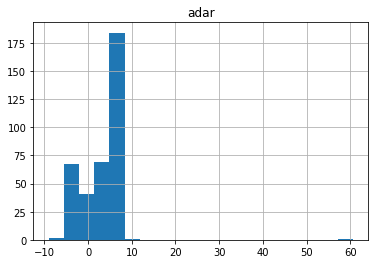

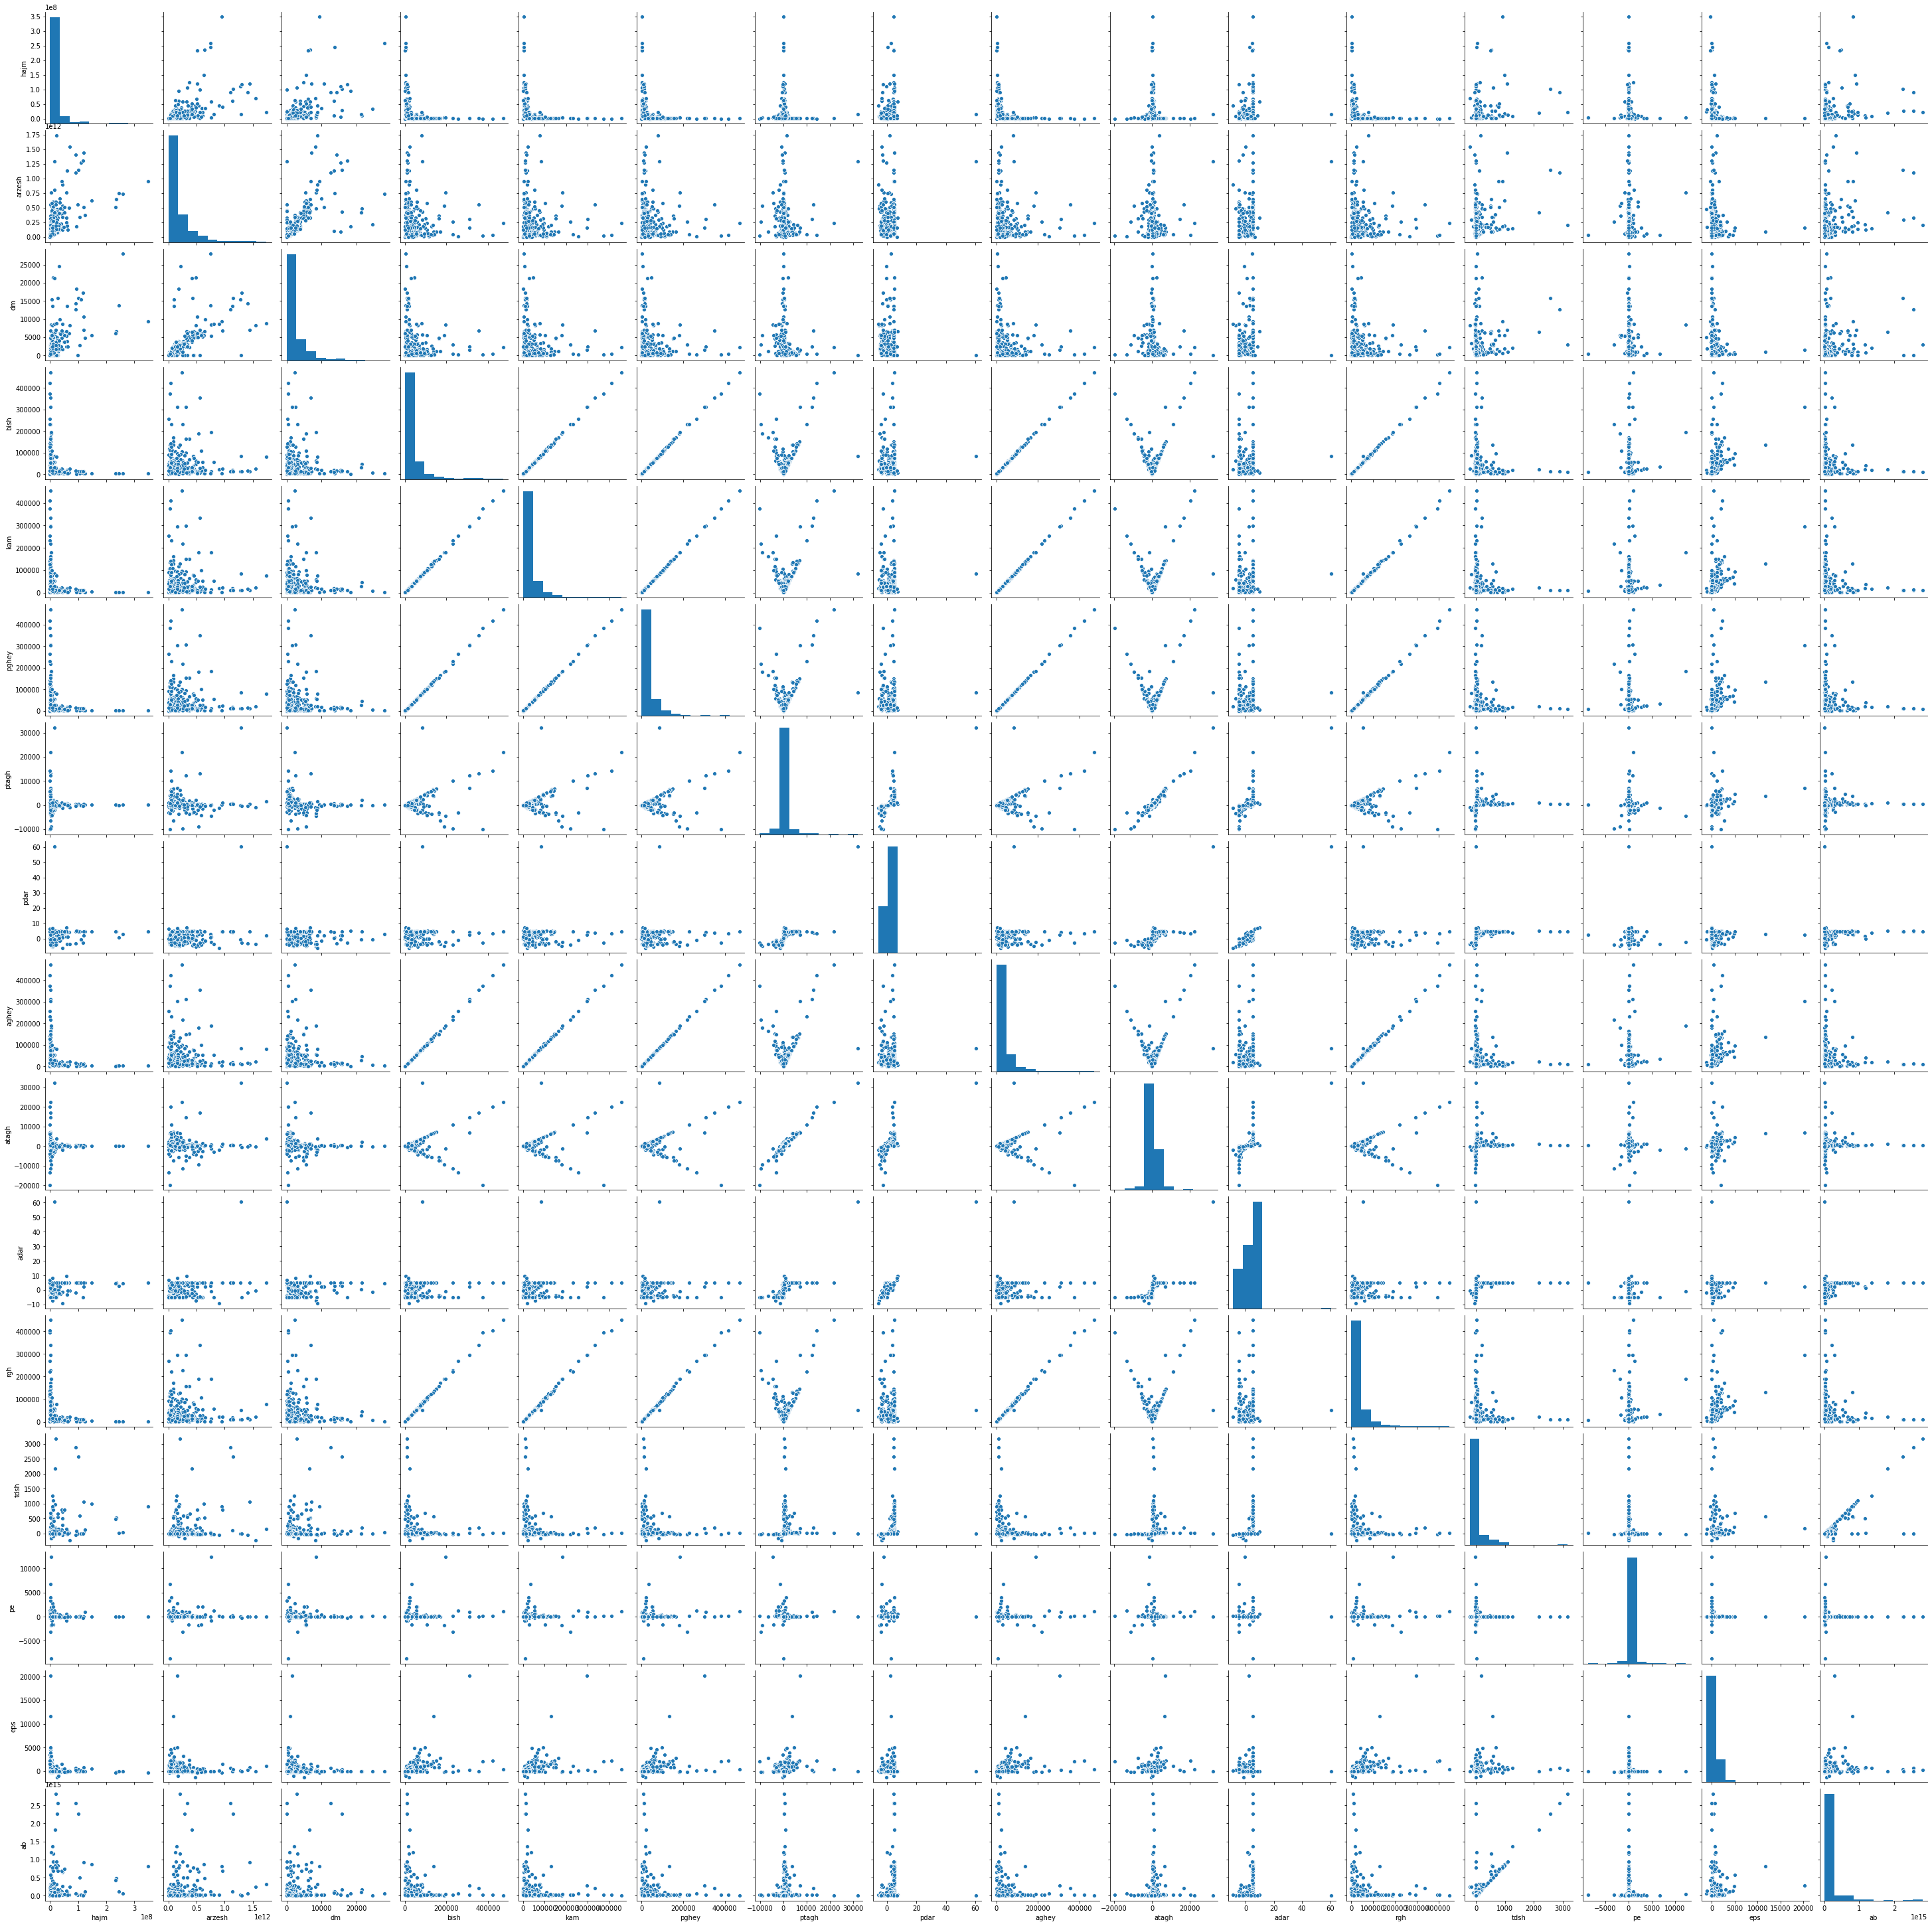

In [45]:
import seaborn as sns

ax = df.hist(column='adar', bins=20)
sns.pairplot(df)

In [ ]:
import urllib.request

for co_id in index:
    dls = "http://tse.ir/archive/Trade/Cash/SymbolTrade/SymbolTrade_{}.xls".format(co_id)
    request.urlretrieve(dls, "/tmp/{}.xls".format(co_id))
    print('{} downloaded'.format(co_id))

In [49]:
from html.parser import HTMLParser
import urllib.request

class TseParser(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self.header = False
        self.headers = []
        self.rows = []
        self.cols = []
    
    def handle_starttag(self, tag, attrs):
        if tag == 'thead':
            self.header = True
        elif tag == 'tr':
            self.cols = []

    def handle_endtag(self, tag):
        if tag == 'thead':
            self.header = False
            self.headers.append(self.cols)
        elif tag == 'tr' and not self.header:
            self.rows.append(self.cols)

    def handle_data(self, data):
        self.cols.append(data)

url = "http://tse.ir/json/Instrument/TradeHistory/TradeHistory_{}.html"
co_data = {}
i = 1
for co_id in index:
    fp = urllib.request.urlopen(url.format(co_id))
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()        

    parser = TseParser()
    parser.feed(mystr)

    co_data[co_id] = pd.DataFrame(parser.rows)

In [51]:
co_data['IRO1ABAD0001']

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1399/11/26,"1,872,130","106,670,454,560",931,"58,900","55,910","56,980",-70,-0.12,"55,910","-1,140",-2,"57,050"
1,1399/11/25,"2,851,143","162,644,361,060","1,331","57,120","55,000","57,050","3,160",5.86,"57,120","3,230",5.99,"53,890"
2,1399/11/21,"2,316,606","124,830,906,870","1,256","54,140","51,850","53,890","2,320",4.5,"54,140","2,570",4.98,"51,570"
3,1399/11/20,"2,255,858","116,324,915,130","1,484","52,820","50,640","51,570",930,1.84,"51,600",960,1.9,"50,640"
4,1399/11/19,"2,944,151","149,105,754,080","1,494","51,220","47,030","50,640","1,850",3.79,"51,220","2,430",4.98,"48,790"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1399/01/19,"3,235,910","47,260,974,777",834,"14,738","14,025","14,566",0,0,"14,738",0,,0
196,1399/01/18,"3,820,465","53,627,743,842","1,045","15,028","13,871","14,037",-564,-3.86,"14,011",-590,-4.04,"14,601"
197,1399/01/17,"2,949,205","43,183,192,349","1,105","15,080","14,000","14,601",232,1.61,"14,600",231,1.61,"14,369"
198,1399/01/16,"2,151,994","30,904,973,271","1,034","14,800","14,002","14,369",-14,-0.1,"14,140",-243,-1.69,"14,383"
